In [20]:
import pandas as pd
from src import util
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import numpy as  np
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
import seaborn as sns
%matplotlib inline

In [21]:
df = pd.read_csv("datasets/dataset.csv")
df = df.dropna()
df_,_=util.baseline_data(df)
df_200 = util.top200(df_,num=50)
df.index = list(range(df.shape[0]))
X,y=util.base44(df)
X["cout_smi"]=util.count_num_SMILES(df)

dfs = [
    X,
    util.count_ionized(df),
    util.count_elements(df),
    df_200,
]
X = pd.concat(dfs,axis=1)

X = util.convert_job(X,StandardScaler())
fps = [
    X,
    util.MACCS(df),
]
X = pd.concat(fps,axis=1)

100%|██████████| 6179/6179 [00:08<00:00, 716.17it/s]


In [22]:
X_base200 = util.convert_job(df_,StandardScaler())
X_base44,_ = util.base44(df)
X_base44 = util.convert_job(X_base44,StandardScaler())

In [23]:
MLPR = MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100,), learning_rate='constant',
             learning_rate_init=0.0016938817242064471, max_iter=10000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
# cv_results = cross_validate(MLPR, X_base200, y, cv=5, scoring='neg_mean_squared_error', return_estimator=True, n_jobs=-1)

In [24]:
df = pd.read_csv("datasets/dataset.csv")
df = df.dropna()
df_,_=util.baseline_data(df)
df_200 = util.top200(df_,num=50)
df.index = list(range(df.shape[0]))
X,y=util.base44(df)
# X["cout_smi"]=util.count_num_SMILES(df)

dfs = [
    X,
    # util.count_ionized(df),
    # util.count_elements(df),
    df_200,
]
X_base44_top50in200 = pd.concat(dfs,axis=1)
X_base44_top50in200 = util.convert_job(X_base44_top50in200,StandardScaler())
X["cout_smi"]=util.count_num_SMILES(df)

dfs = [
    X,
    util.count_ionized(df),
    util.count_elements(df),
    df_200,
]
X_base44_top50in200_count = pd.concat(dfs,axis=1)
X_base44_top50in200_count = util.convert_job(X_base44_top50in200_count,StandardScaler())
fps = [
    X_base44_top50in200_count,
    util.MACCS(df),
]
X_base44_top50in200_count_MACCS = pd.concat(fps,axis=1)
X_base44_MACCS = pd.concat([X_base44,util.MACCS(df)],axis=1)
X_base44_count = pd.concat([X_base44,util.count_ionized(df),util.count_elements(df),],axis=1)
X_base44_top50in200_MACCS = pd.concat([X_base44_top50in200,util.MACCS(df)],axis=1)
# Xs = [X_base200,X_base44,df_200,X_base44_top50in200,X_base44_top50in200_count,X_base44_MACCS,X_base44_count,X_base44_top50in200_count_MACCS]
# results = []
# for x in Xs:
#     print(x.shape,y.shape)
#     cv_results = cross_validate(MLPR, x, y, cv=5, scoring='neg_mean_squared_error', return_estimator=True, n_jobs=-1)
#     results.append(-cv_results["test_score"])

100%|██████████| 6179/6179 [00:08<00:00, 737.00it/s]


In [25]:
Xs = [X_base200,
X_base44,
# util.convert_job(df_200,StandardScaler()),
X_base44_top50in200,
X_base44_MACCS,
# X_base44_count,
X_base44_top50in200_count,
X_base44_top50in200_MACCS,
X_base44_top50in200_count_MACCS
]
results_mlpr = []
for x in Xs:
    print(x.shape,y.shape)
    cv_results = cross_validate(MLPR, x, y, cv=5, scoring='neg_mean_squared_error', return_estimator=True, n_jobs=-1)
    results_mlpr.append(-cv_results["test_score"])
results_mlpr

(6179, 200) (6179,)
(6179, 44) (6179,)
(6179, 94) (6179,)
(6179, 211) (6179,)
(6179, 124) (6179,)
(6179, 261) (6179,)
(6179, 291) (6179,)


[array([0.30315889, 0.25321475, 0.29473106, 0.27411987, 0.33246306]),
 array([0.31878792, 0.26712605, 0.29919694, 0.32390921, 0.33021727]),
 array([0.28889839, 0.26652568, 0.28776666, 0.28020419, 0.31722094]),
 array([0.24436291, 0.21690608, 0.22342302, 0.28904196, 0.29651992]),
 array([0.28317209, 0.26733635, 0.29149294, 0.31127633, 0.29386875]),
 array([0.2220602 , 0.24655417, 0.23337362, 0.23516627, 0.28038444]),
 array([0.24675396, 0.22324317, 0.24021171, 0.24516481, 0.26666882])]

In [26]:
from lightgbm import LGBMRegressor
results_lgbm = []
for x in Xs:
    print(x.shape,y.shape)
    cv_results = cross_validate(LGBMRegressor(), x, y, cv=5, scoring='neg_mean_squared_error', return_estimator=True, n_jobs=-1)
    results_lgbm.append(-cv_results["test_score"])
results_lgbm

(6179, 200) (6179,)
(6179, 44) (6179,)
(6179, 94) (6179,)
(6179, 211) (6179,)
(6179, 124) (6179,)
(6179, 261) (6179,)
(6179, 291) (6179,)


[array([0.28162704, 0.24671949, 0.26963304, 0.2526803 , 0.2971293 ]),
 array([0.28388646, 0.24955425, 0.27812216, 0.26860041, 0.30398683]),
 array([0.28373099, 0.24260173, 0.28274534, 0.26813838, 0.29291041]),
 array([0.27384952, 0.23529266, 0.26539497, 0.25466588, 0.28429568]),
 array([0.27814583, 0.23187061, 0.27367908, 0.26658009, 0.29265625]),
 array([0.26893993, 0.22861934, 0.25509274, 0.25887454, 0.28409388]),
 array([0.26294144, 0.2279291 , 0.26048417, 0.25467076, 0.28513753])]

In [27]:
results_mlpr_default = []
for x in Xs:
    print(x.shape,y.shape)
    cv_results = cross_validate(MLPRegressor(), x, y, cv=5, scoring='neg_mean_squared_error', return_estimator=True, n_jobs=-1)
    results_mlpr_default.append(-cv_results["test_score"])
results_mlpr_default

(6179, 200) (6179,)
(6179, 44) (6179,)
(6179, 94) (6179,)
(6179, 211) (6179,)
(6179, 124) (6179,)
(6179, 261) (6179,)
(6179, 291) (6179,)


[array([0.29596656, 0.25297997, 0.29047275, 0.29105173, 0.99998735]),
 array([0.27862112, 0.25447379, 0.31659105, 0.60015976, 0.32631925]),
 array([0.28791768, 0.26667675, 0.27027637, 0.30856564, 0.31418324]),
 array([0.24013975, 0.24974686, 0.24939225, 0.30659407, 0.30379013]),
 array([0.31074182, 0.24896017, 1.88240061, 2.53842233, 0.29083831]),
 array([0.28833697, 0.20147155, 0.24315807, 0.27044879, 0.24745228]),
 array([0.22842076, 0.24383964, 0.93039418, 1.15393229, 0.25397885])]

In [28]:
results_ridge = []
for x in Xs:
    print(x.shape,y.shape)
    cv_results = cross_validate(Ridge(), x, y, cv=5, scoring='neg_mean_squared_error', return_estimator=True, n_jobs=-1)
    results_ridge.append(-cv_results["test_score"])
results_ridge

(6179, 200) (6179,)
(6179, 44) (6179,)
(6179, 94) (6179,)
(6179, 211) (6179,)
(6179, 124) (6179,)
(6179, 261) (6179,)
(6179, 291) (6179,)


[array([0.39186182, 0.38331654, 0.40239899, 0.43087714, 0.42147639]),
 array([0.49650594, 0.47323549, 0.50864329, 0.54619836, 0.53804985]),
 array([0.41645068, 0.35638425, 0.39479314, 0.67746593, 0.50738291]),
 array([0.35915257, 0.33005955, 0.3741442 , 0.42670439, 0.40459287]),
 array([0.3980956 , 0.33153674, 0.38349768, 0.45417253, 0.47755889]),
 array([0.32768262, 0.28540995, 0.33284265, 0.37156372, 0.40800438]),
 array([0.32676635, 0.28407687, 0.32025246, 0.33903147, 0.41181916])]

       variable     value species
0  [1]\nbase200  0.391862   Ridge
1  [1]\nbase200  0.383317   Ridge
2  [1]\nbase200  0.402399   Ridge
3  [1]\nbase200  0.430877   Ridge
4  [1]\nbase200  0.421476   Ridge


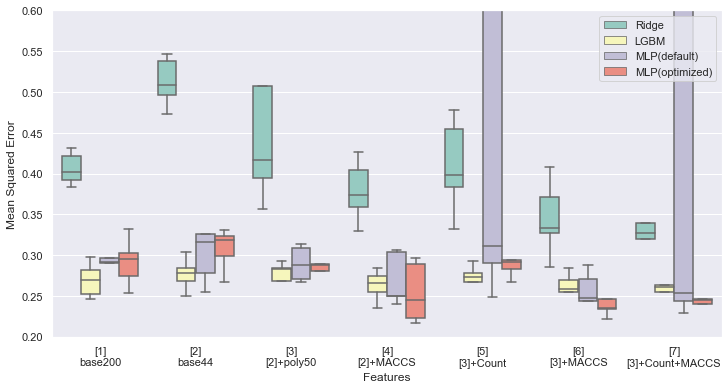

In [29]:
sns.set()
# sns.set_style('whitegrid')
# sns.set_palette('gray')

# # np.random.seed(2018)

# # x1 = np.random.normal(10, 2, 20)
# # x1 = -cv_results["test_score"]
# # x2 = np.random.normal(15, 3, 20)
# # x3 = np.random.normal(5, 1, 20)

# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# ax.boxplot([i for i in results], labels=["[1]\nbase200","[2]\nbase44","[3]\n[2]+poly50","[4]\n[3]+count","[5]\n[4]+MACCS"])
# sns.stripplot(x='variable', y='value', data=df_melt, jitter=True, color='black', ax=ax)
# ax.set_xlabel('Features')
# ax.set_ylabel('Mean Squared Error')
# ax.set_ylim(0.1, 0.4)

# np.random.seed(2018)

# data of Ta (T. aestivum) group

# Xs = [X_base200,
# X_base44,
# df_200,
# X_base44_top50in200,
# X_base44_MACCS,
# X_base44_count,
# X_base44_top50in200_count,
# X_base44_top50in200_count_MACCS]

Xs = [X_base200,
X_base44,
# util.convert_job(df_200,StandardScaler()),
X_base44_top50in200,
X_base44_MACCS,
# X_base44_count,
X_base44_top50in200_count,
X_base44_top50in200_MACCS,
X_base44_top50in200_count_MACCS
]

keys = ["[1]\nbase200",
        "[2]\nbase44",
        "[3]\n[2]+poly50",
        "[4]\n[2]+MACCS",
        "[5]\n[3]+Count",
        "[6]\n[3]+MACCS",
        "[7]\n[3]+Count+MACCS"
]


# d = dict(zip(keys, values))

df_result_ridge = pd.DataFrame(dict(zip(keys, results_ridge)))
df_result_lgbm = pd.DataFrame(dict(zip(keys, results_lgbm)))
df_result_mlpr_default = pd.DataFrame(dict(zip(keys, results_mlpr_default)))
df_result_mlpr = pd.DataFrame(dict(zip(keys, results_mlpr)))

# pd.DataFrame({
#     "[1]\nbase200": results_ridge[0],
#     "[2]\nbase44": results_ridge[1],
#     "[3]\n[2]+poly50": results_ridge[2],
#     "[4]\n[3]+count": results_ridge[3],
#     "[5]\n[4]+MACCS": results_ridge[4],
#     "[6]\n[2]+MACCS": results_ridge[5]
# })

# df_result_lgbm = pd.DataFrame({
#     "[1]\nbase200": results_lgbm[0],
#     "[2]\nbase44": results_lgbm[1],
#     "[3]\n[2]+poly50": results_lgbm[2],
#     "[4]\n[3]+count": results_lgbm[3],
#     "[5]\n[4]+MACCS": results_lgbm[4],
#     "[6]\n[2]+MACCS": results_lgbm[5]
# })

# df_result_mlpr_default = pd.DataFrame({
#     "[1]\nbase200": results_mlpr_default[0],
#     "[2]\nbase44": results_mlpr_default[1],
#     "[3]\n[2]+poly50": results_mlpr_default[2],
#     "[4]\n[3]+count": results_mlpr_default[3],
#     "[5]\n[4]+MACCS": results_mlpr_default[4],
#     "[6]\n[2]+MACCS": results_mlpr_default[5]
# })

# df_result_mlpr = pd.DataFrame({
#     "[1]\nbase200": results_mlpr[0],
#     "[2]\nbase44": results_mlpr[1],
#     "[3]\n[2]+poly50": results_mlpr[2],
#     "[4]\n[3]+count": results_mlpr[3],
#     "[5]\n[4]+MACCS": results_mlpr[4],
#     "[6]\n[2]+MACCS": results_mlpr[5]
# })

df_result_mlpr_melt = pd.melt(df_result_mlpr)
df_result_mlpr_melt['species'] = 'MLP(optimized)'
df_result_mlpr_default_melt = pd.melt(df_result_mlpr_default)
df_result_mlpr_default_melt['species'] = 'MLP(default)'
df_result_lgbm_melt = pd.melt(df_result_lgbm)
df_result_lgbm_melt['species'] = 'LGBM'
df_result_ridge_melt = pd.melt(df_result_ridge)
df_result_ridge_melt['species'] = 'Ridge'

df = pd.concat([df_result_ridge_melt,df_result_lgbm_melt, df_result_mlpr_default_melt, df_result_mlpr_melt], axis=0)
print(df.head())
##   variable      value      species
## 0     leaf  11.871913  A. tauschii
## 1     leaf  16.013749  A. tauschii
## 2     leaf  11.930841  A. tauschii
## 3     leaf  14.794698  A. tauschii
## 4     leaf   8.642995  A. tauschii

fig = plt.figure(figsize=(12.0, 6.0))
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(x='variable', y='value', data=df, hue='species', showfliers=False, palette='Set3', ax=ax)
# sns.stripplot(x='variable', y='value', data=df, hue='species', dodge=True, jitter=True, color='black', ax=ax)


handles, labels = ax.get_legend_handles_labels()

# 4 legends for defaul: boxplot x 2 species, and stripplot x 2 species
# use the first 2 legends
ax.legend(handles[0:4], labels[0:4])
ax.set_xlabel('Features')
ax.set_ylabel('Mean Squared Error')
ax.set_ylim(0.2, 0.6)
plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# sns.boxplot(x='variable', y='value', data=df_melt, showfliers=False, ax=ax)
# sns.stripplot(x='variable', y='value', data=df_melt, jitter=True, color='black', ax=ax)
# ax.set_xlabel('Features')
# ax.set_ylabel('Mean Squared Error')
# ax.set_ylim(0.1, 0.4)
# plt.show()

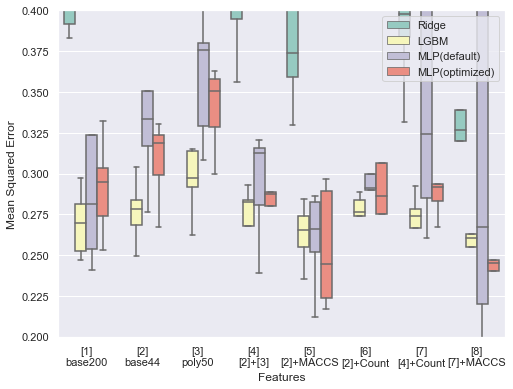

In [19]:
sns.set()
fig = plt.figure(figsize=(8.0, 6.0))
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(x='variable', y='value', data=df, hue='species', showfliers=False, palette='Set3', ax=ax)
# sns.stripplot(x='variable', y='value', data=df, hue='species', dodge=True, jitter=True, color='black', ax=ax)


handles, labels = ax.get_legend_handles_labels()

# 4 legends for defaul: boxplot x 2 species, and stripplot x 2 species
# use the first 2 legends
ax.legend(handles[0:4], labels[0:4])
ax.set_xlabel('Features')
ax.set_ylabel('Mean Squared Error')
ax.set_ylim(0.2, 0.4)
plt.show()

In [16]:
results_mlpr

[array([0.30315889, 0.25321475, 0.29473106, 0.27411987, 0.33246306]),
 array([0.31878792, 0.26712605, 0.29919694, 0.32390921, 0.33021727]),
 array([0.28889839, 0.26652568, 0.28776666, 0.28020419, 0.31722094]),
 array([0.28317209, 0.26733635, 0.29149294, 0.31127633, 0.29386875]),
 array([0.24675396, 0.22324317, 0.24021171, 0.24516481, 0.26666882]),
 array([0.24436291, 0.21690608, 0.22342302, 0.28904196, 0.29651992])]